<a href="https://colab.research.google.com/github/JamesMcGuigan/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/NLP%20Course%20-%20Week%203%20Exercise%20Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q tensorflow==2.1.0 tensorflow-gpu==2.1.0

In [0]:
import json
import tensorflow as tf
import csv
import random
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers


embedding_dim = 100
max_length    = 16
trunc_type    = 'post'
padding_type  = 'post'
oov_tok       = "<OOV>"
training_size = 160000 // 10  #Your dataset size here. Experiment using smaller values (i.e. 16000), but don't forget to train on at least 160000 to see the best effects
test_portion  = .1


In [3]:
# Note that I cleaned the Stanford dataset to remove LATIN1 encoding to make it easier for Python CSV reader
# You can do that yourself with:
# iconv -f LATIN1 -t UTF8 training.1600000.processed.noemoticon.csv -o training_cleaned.csv
# I then hosted it on my site to make it easier to use in this notebook

!wget -c --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/training_cleaned.csv \
    -O /tmp/training_cleaned.csv

--2020-03-25 04:00:13--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/training_cleaned.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.3.48, 2607:f8b0:4026:803::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.3.48|:443... connected.
HTTP request sent, awaiting response... 416 Requested range not satisfiable

    The file is already fully retrieved; nothing to do.



In [4]:
int(bool(int('4')))

1

In [5]:
num_sentences = 0
corpus = []
with open("/tmp/training_cleaned.csv") as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        # Your Code here. Create list items where the first item is the text, found in row[5], and the second is the label. Note that the label is a '0' or a '4' in the text. When it's the former, make
        # your label to be 0, otherwise 1. Keep a count of the number of sentences in num_sentences
        num_sentences = num_sentences + 1
        list_item     = [ row[5], int(bool(int(row[0]))) ]        
        corpus.append(list_item)

corpus[100:105]

[[' Body Of Missing Northern Calif. Girl Found: Police have found the remains of a missing Northern California girl .. http://tr.im/imji',
  0],
 ['@mangaaa I hope they will increase the capacity fast, yesterday was such a pain. Got the fail whale +15 times in 2 hours.... ',
  0],
 ['Behind on my classes for work ', 0],
 ['watching &quot;House&quot; ', 0],
 ['@kpreyes Remember my bum leg? Strikes back this time its serious ', 0]]

In [6]:
print(num_sentences)
print(len(corpus))
print(corpus[1])

# Expected Output:
# 1600000
# 1600000
# ["is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!", 0]

1600000
1600000
["is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!", 0]


In [0]:
sentences = []
labels    = []
random.shuffle(corpus)
for x in range(training_size):
    sentences.append(corpus[x][0])
    labels.append(corpus[x][1])

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

word_index = tokenizer.word_index
vocab_size = len(word_index)

sequences = tokenizer.texts_to_sequences(sentences)
padded    = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


split = int(test_portion * training_size)

test_sequences     = padded[:split]
training_sequences = padded[split:training_size]
test_labels        = np.array(labels[:split])
training_labels    = np.array(labels[split:training_size])

In [8]:
print(vocab_size)
print(word_index['i'])
# Expected Output
# 138858
# 1

26799
1


In [9]:
# Note this is the 100 dimension version of GloVe from Stanford
# I unzipped and hosted it on my site to make this notebook easier
!wget -c --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt \
    -O /tmp/glove.6B.100d.txt

--2020-03-25 04:00:22--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/glove.6B.100d.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.3.48, 2607:f8b0:4026:803::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.3.48|:443... connected.
HTTP request sent, awaiting response... 416 Requested range not satisfiable

    The file is already fully retrieved; nothing to do.



In [0]:
embeddings_index = {};
with open('/tmp/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split();
        word   = values[0];
        coefs  = np.asarray(values[1:], dtype='float32');
        embeddings_index[word] = coefs;

embeddings_matrix = np.zeros((vocab_size+1, embedding_dim));
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word);
    if embedding_vector is not None:
        embeddings_matrix[i] = embedding_vector;

In [11]:
print(len(embeddings_matrix))
# Expected Output
# 138859

26800


In [0]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

def plot_history(history):
  #-----------------------------------------------------------
  # Retrieve a list of list results on training and test data
  # sets for each training epoch
  #-----------------------------------------------------------
  acc      = history.history['accuracy']
  val_acc  = history.history['val_accuracy']
  loss=history.history['loss']
  val_loss = history.history['val_loss']

  epochs=range(len(acc)) # Get number of epochs

  #------------------------------------------------
  # Plot training and validation accuracy per epoch
  #------------------------------------------------
  plt.plot(epochs, acc, 'r')
  plt.plot(epochs, val_acc, 'b')
  plt.title('Training and validation accuracy')
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend(["Accuracy", "Validation Accuracy"])

  plt.figure()

  #------------------------------------------------
  # Plot training and validation loss per epoch
  #------------------------------------------------
  plt.plot(epochs, loss, 'r')
  plt.plot(epochs, val_loss, 'b')
  plt.title('Training and validation loss')
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend(["Loss", "Validation Loss"])

  plt.figure()


  # Expected Output
  # A chart where the validation loss does not increase sharply!

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 16, 100)           2680000   
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 12, 64)            32064     
_________________________________________________________________
flatten_8 (Flatten)          (None, 768)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 769       
Total params: 2,712,833
Trainable params: 32,833
Non-trainable params: 2,680,000
_________________________________________________________________
Train on 14400 samples, validate on 1600 samples
14400/14400 - 1s - loss: 0.0091 - accuracy: 0.9965 - val_loss: 2.3065 - val_accuracy: 0.6513
Training Complete


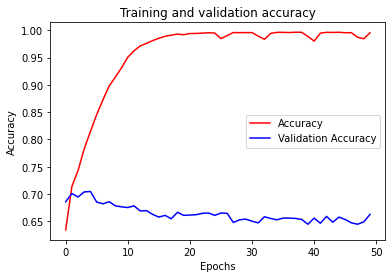

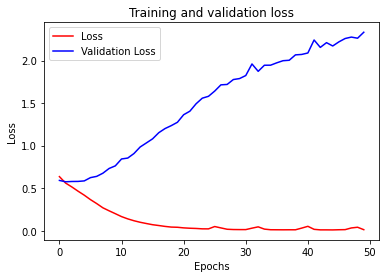

<Figure size 432x288 with 0 Axes>

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    # tf.keras.layers.Conv1D(128, 5, activation='relu'),    
    # tf.keras.layers.MaxPooling1D(pool_size=4),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, activation='relu')),
    # tf.keras.layers.Dropout(0.2),
    # tf.keras.layers.MaxPooling1D(pool_size=4),
    # tf.keras.layers.LSTM(64),    
    tf.keras.layers.Flatten(),    
    tf.keras.layers.Dense(1, activation='sigmoid')    
])
model.compile(loss=tf.losses.binary_crossentropy, optimizer=tf.optimizers.Adam(), metrics=['accuracy'])
model.summary()

num_epochs = 50
history = model.fit(
    training_sequences, 
    training_labels, 
    epochs=num_epochs, 
    validation_data=(test_sequences, test_labels), 
    verbose=0
)
model.fit(
    training_sequences, 
    training_labels, 
    epochs=1, 
    validation_data=(test_sequences, test_labels), 
    verbose=2
)
print("Training Complete")
plot_history(history)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, 16, 100)           2680000   
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 7, 128)            128128    
_________________________________________________________________
flatten_9 (Flatten)          (None, 896)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 897       
Total params: 2,809,025
Trainable params: 129,025
Non-trainable params: 2,680,000
_________________________________________________________________
Train on 14400 samples, validate on 1600 samples
14400/14400 - 1s - loss: 0.0558 - accuracy: 0.9803 - val_loss: 2.1732 - val_accuracy: 0.6594
Training Complete


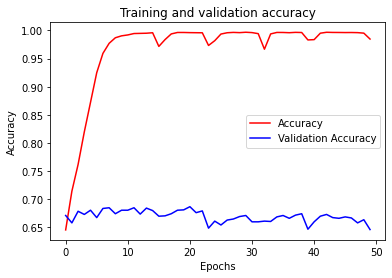

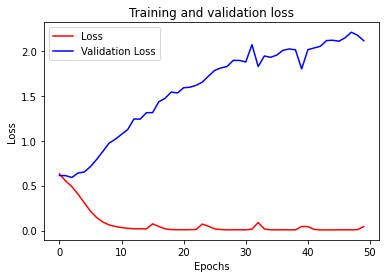

<Figure size 432x288 with 0 Axes>

In [27]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.Conv1D(128, 10, activation='relu'),
    # tf.keras.layers.Conv1D(128, 5, activation='relu'),    
    # tf.keras.layers.MaxPooling1D(pool_size=4),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, activation='relu')),
    # tf.keras.layers.Dropout(0.2),
    # tf.keras.layers.MaxPooling1D(pool_size=4),
    # tf.keras.layers.LSTM(64),    
    tf.keras.layers.Flatten(),    
    tf.keras.layers.Dense(1, activation='sigmoid')    
])
model.compile(loss=tf.losses.binary_crossentropy, optimizer=tf.optimizers.Adam(), metrics=['accuracy'])
model.summary()

num_epochs = 50
history = model.fit(
    training_sequences, 
    training_labels, 
    epochs=num_epochs, 
    validation_data=(test_sequences, test_labels), 
    verbose=0
)
model.fit(
    training_sequences, 
    training_labels, 
    epochs=1, 
    validation_data=(test_sequences, test_labels), 
    verbose=2
)
print("Training Complete")
plot_history(history)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 16, 100)           2680000   
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 12, 64)            32064     
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 8, 128)            41088     
_________________________________________________________________
flatten_7 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 1025      
Total params: 2,754,177
Trainable params: 74,177
Non-trainable params: 2,680,000
_________________________________________________________________
Train on 14400 samples, validate on 1600 samples
14400/14400 - 1s - loss: 0.1077 - accuracy: 0.9634 - val

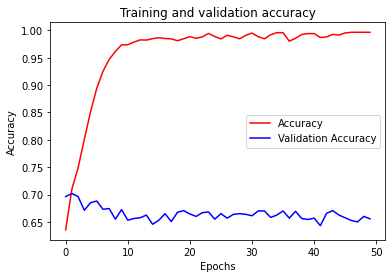

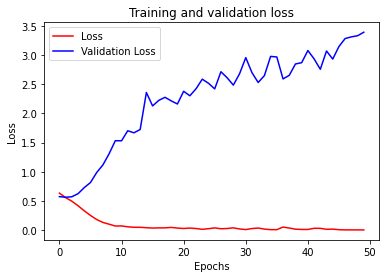

<Figure size 432x288 with 0 Axes>

In [25]:
|model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),    
    # tf.keras.layers.MaxPooling1D(pool_size=4),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, activation='relu')),
    # tf.keras.layers.Dropout(0.2),
    # tf.keras.layers.MaxPooling1D(pool_size=4),
    # tf.keras.layers.LSTM(64),    
    tf.keras.layers.Flatten(),    
    tf.keras.layers.Dense(1, activation='sigmoid')    
])
model.compile(loss=tf.losses.binary_crossentropy, optimizer=tf.optimizers.Adam(), metrics=['accuracy'])
model.summary()

num_epochs = 50
history = model.fit(
    training_sequences, 
    training_labels, 
    epochs=num_epochs, 
    validation_data=(test_sequences, test_labels), 
    verbose=0
)
model.fit(
    training_sequences, 
    training_labels, 
    epochs=1, 
    validation_data=(test_sequences, test_labels), 
    verbose=2
)
print("Training Complete")
plot_history(history)

ERROR! Session/line number was not unique in database. History logging moved to new session 67
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 16, 100)           2680000   
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 4, 100)            0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               84480     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 129       
Total params: 2,764,609
Trainable params: 84,609
Non-trainable params: 2,680,000
_________________________________________________________________
Train on 

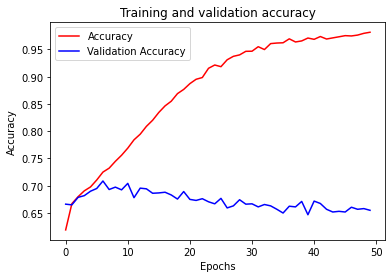

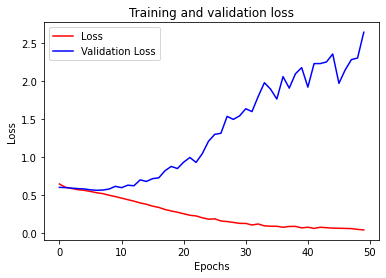

<Figure size 432x288 with 0 Axes>

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
    # tf.keras.layers.Conv1D(64, 5, activation='relu'),
    # tf.keras.layers.Conv1D(128, 5, activation='relu'),    
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, activation='relu')),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')    
])
model.compile(loss=tf.losses.binary_crossentropy, optimizer=tf.optimizers.Adam(), metrics=['accuracy'])
model.summary()

num_epochs = 50
history = model.fit(
    training_sequences, 
    training_labels, 
    epochs=num_epochs, 
    validation_data=(test_sequences, test_labels), 
    verbose=0
)
model.fit(
    training_sequences, 
    training_labels, 
    epochs=1, 
    validation_data=(test_sequences, test_labels), 
    verbose=2
)
print("Training Complete")
plot_history(history)

ERROR! Session/line number was not unique in database. History logging moved to new session 68
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 16, 100)           2680000   
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 4, 100)            0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 4, 128)            84480     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 256)               263168    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 257       
Total params: 3,027,905


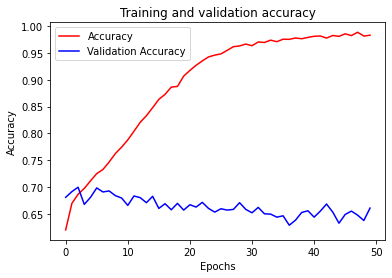

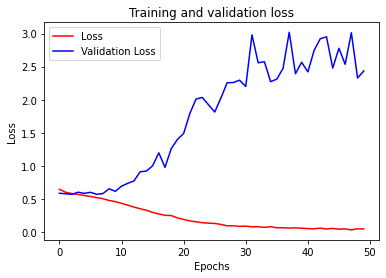

<Figure size 432x288 with 0 Axes>

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
    # tf.keras.layers.Conv1D(64, 5, activation='relu'),
    # tf.keras.layers.Conv1D(128, 5, activation='relu'),    
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM( 64, activation='relu', return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, activation='relu')),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')    
])
model.compile(loss=tf.losses.binary_crossentropy, optimizer=tf.optimizers.Adam(), metrics=['accuracy'])
model.summary()

num_epochs = 50
history = model.fit(
    training_sequences, 
    training_labels, 
    epochs=num_epochs, 
    validation_data=(test_sequences, test_labels), 
    verbose=0
)
model.fit(
    training_sequences, 
    training_labels, 
    epochs=1, 
    validation_data=(test_sequences, test_labels), 
    verbose=2
)
print("Training Complete")
plot_history(history)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_14 (Embedding)     (None, 16, 100)           2680000   
_________________________________________________________________
conv1d_14 (Conv1D)           (None, 12, 64)            32064     
_________________________________________________________________
conv1d_15 (Conv1D)           (None, 8, 128)            41088     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 2, 128)            0         
_________________________________________________________________
bidirectional_6 (Bidirection (None, 2, 128)            98816     
_________________________________________________________________
bidirectional_7 (Bidirection (None, 256)               263168    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)             

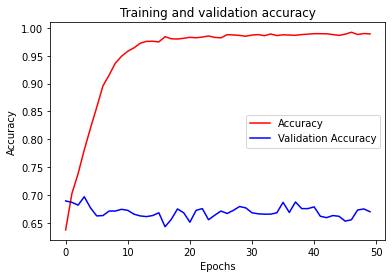

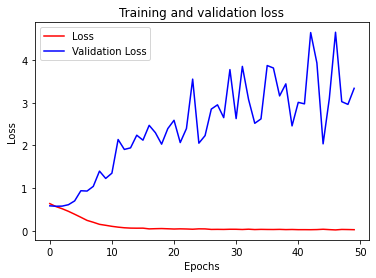

<Figure size 432x288 with 0 Axes>

In [30]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),    
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM( 64, activation='relu', return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, activation='relu')),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')    
])
model.compile(loss=tf.losses.binary_crossentropy, optimizer=tf.optimizers.Adam(), metrics=['accuracy'])
model.summary()

num_epochs = 50
history = model.fit(
    training_sequences, 
    training_labels, 
    epochs=num_epochs, 
    validation_data=(test_sequences, test_labels), 
    verbose=0
)
model.fit(
    training_sequences, 
    training_labels, 
    epochs=1, 
    validation_data=(test_sequences, test_labels), 
    verbose=2
)
print("Training Complete")
plot_history(history)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 16, 100)           2680000   
_________________________________________________________________
dropout_5 (Dropout)          (None, 16, 100)           0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 12, 64)            32064     
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 8, 128)            41088     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 2, 128)            0         
_________________________________________________________________
bidirectional_8 (Bidirection (None, 2, 128)            98816     
_________________________________________________________________
bidirectional_9 (Bidirection (None, 256)             

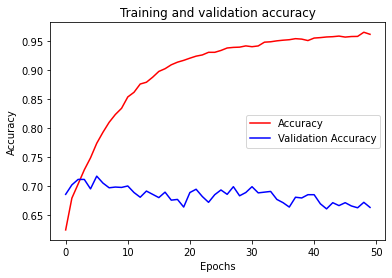

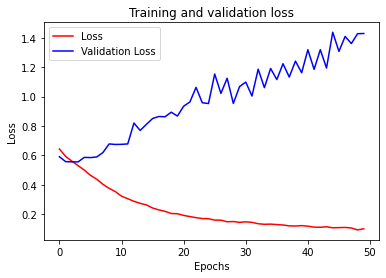

<Figure size 432x288 with 0 Axes>

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.Dropout(0.2),    
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),    
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM( 64, activation='relu', return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, activation='relu')),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')    
])
model.compile(loss=tf.losses.binary_crossentropy, optimizer=tf.optimizers.Adam(), metrics=['accuracy'])
model.summary()

num_epochs = 50
history = model.fit(
    training_sequences, 
    training_labels, 
    epochs=num_epochs, 
    validation_data=(test_sequences, test_labels), 
    verbose=0
)
model.fit(
    training_sequences, 
    training_labels, 
    epochs=1, 
    validation_data=(test_sequences, test_labels), 
    verbose=2
)
print("Training Complete")
plot_history(history)

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 16, 100)           2680000   
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 100)           0         
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 12, 128)           64128     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 3, 128)            0         
_________________________________________________________________
bidirectional_10 (Bidirectio (None, 3, 128)            98816     
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 256)               263168    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)             

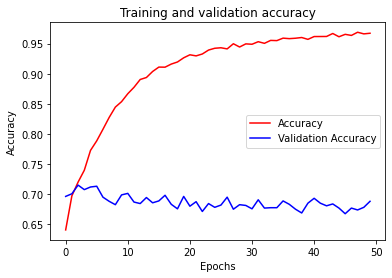

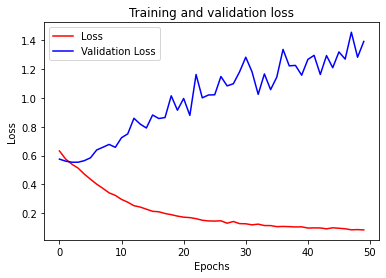

<Figure size 432x288 with 0 Axes>

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.Dropout(0.2),    
    tf.keras.layers.Conv1D(128, 5, activation='relu'),    
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM( 64, activation='relu', return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, activation='relu')),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')    
])
model.compile(loss=tf.losses.binary_crossentropy, optimizer=tf.optimizers.Adam(), metrics=['accuracy'])
model.summary()

num_epochs = 50
history = model.fit(
    training_sequences, 
    training_labels, 
    epochs=num_epochs, 
    validation_data=(test_sequences, test_labels), 
    verbose=0
)
model.fit(
    training_sequences, 
    training_labels, 
    epochs=1, 
    validation_data=(test_sequences, test_labels), 
    verbose=2
)
print("Training Complete")
plot_history(history)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 16, 100)           2680000   
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 100)           0         
_________________________________________________________________
conv1d_19 (Conv1D)           (None, 12, 128)           64128     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 3, 128)            0         
_________________________________________________________________
lstm_12 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)               

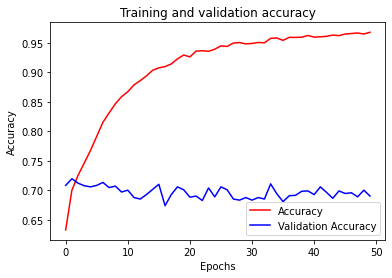

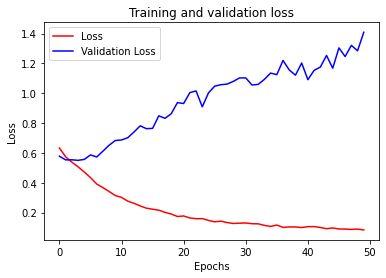

<Figure size 432x288 with 0 Axes>

In [33]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.Dropout(0.2),    
    tf.keras.layers.Conv1D(128, 5, activation='relu'),    
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')    
])
model.compile(loss=tf.losses.binary_crossentropy, optimizer=tf.optimizers.Adam(), metrics=['accuracy'])
model.summary()

num_epochs = 50
history = model.fit(
    training_sequences, 
    training_labels, 
    epochs=num_epochs, 
    validation_data=(test_sequences, test_labels), 
    verbose=0
)
model.fit(
    training_sequences, 
    training_labels, 
    epochs=1, 
    validation_data=(test_sequences, test_labels), 
    verbose=2
)
print("Training Complete")
plot_history(history)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, 16, 100)           2680000   
_________________________________________________________________
dropout_11 (Dropout)         (None, 16, 100)           0         
_________________________________________________________________
conv1d_20 (Conv1D)           (None, 12, 128)           64128     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 3, 128)            0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 128)               131584    
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 129       
Total params: 2,875,841
Trainable params: 195,841
Non-trainable params: 2,680,000
_____________________________________

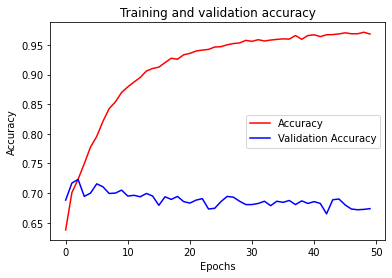

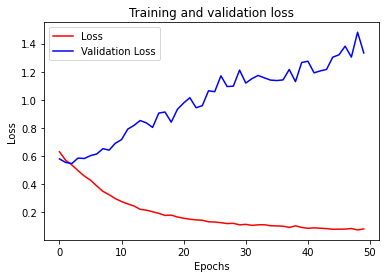

<Figure size 432x288 with 0 Axes>

In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length, weights=[embeddings_matrix], trainable=False),
    tf.keras.layers.Dropout(0.2),    
    tf.keras.layers.Conv1D(128, 5, activation='relu'),    
    tf.keras.layers.MaxPooling1D(pool_size=4),
    tf.keras.layers.LSTM(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')    
])
model.compile(loss=tf.losses.binary_crossentropy, optimizer=tf.optimizers.Adam(), metrics=['accuracy'])
model.summary()

num_epochs = 50
history = model.fit(
    training_sequences, 
    training_labels, 
    epochs=num_epochs, 
    validation_data=(test_sequences, test_labels), 
    verbose=0
)
model.fit(
    training_sequences, 
    training_labels, 
    epochs=1, 
    validation_data=(test_sequences, test_labels), 
    verbose=2
)
print("Training Complete")
plot_history(history)